# Machine Learning in scikit-learn

> [scikit-learn](http://scikit-learn.org/) or *sklearn* is a Machine Learning library in Python. It is fully interoperable with *numpy* and *scipy*.

Through this tutorial we will get acquainted with the main functionality of scikit-learn.

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The first thing we'll do is to load a dataset. Sklearn has a submodule called `datasets` which contains many popular datasets we can use.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


The `iris` object contains 5 things:
- `data` a numpy array containing of the dataset's training examples.
- `feature_names` is a list containing the names of each feature.
- `target` is an array containing the labels (or targets) for all the examples.
- `target_names` is an array containing the names of the three target classes.
- `DESCR` is a string containing the description of the dataset.

In [3]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
print('Features:', iris['data'].shape)
print('Labels:', iris['target'].shape)
print('Classes:', iris['target_names'])

Features: (150, 4)
Labels: (150,)
Classes: ['setosa' 'versicolor' 'virginica']


This dataset contains 150 examples, split over three classes. Each example has 4 features.

More information on the datasets scikit-learn provides can he found [here](http://scikit-learn.org/stable/datasets/index.html#datasets).

## train/test split

The first thing we want to do is to **shuffle** the dataset along its rows and **split** it into two parts. The first of these two will be used to train the classifier; we'll call this the **training set**. The second will be used to evaluate the classifier's performance on and will be referred to as the **test set**. 

It is crucial **not** to evaluate the classifier's performance on the training set, as they usually suffer from a problem called *overfitting*, which we will investigate later on. It is also important to first shuffle the data before splitting it, so that the test set's distribution matches the training set's.

The whole procedure is depicted in the following figures. First, we shuffle and split the data (the percentages are arbitrary):

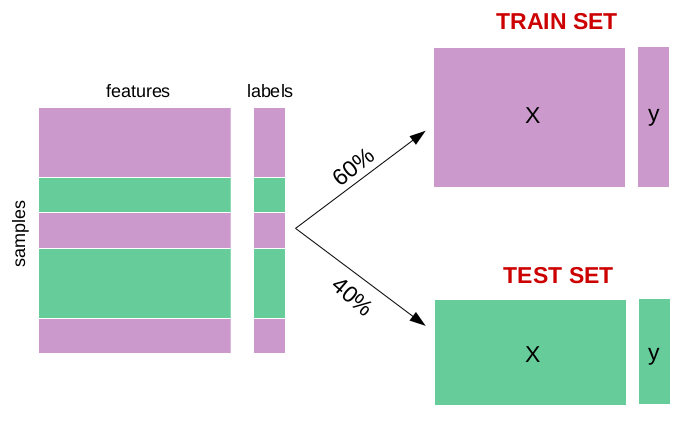

Then we use the training set to train the model:

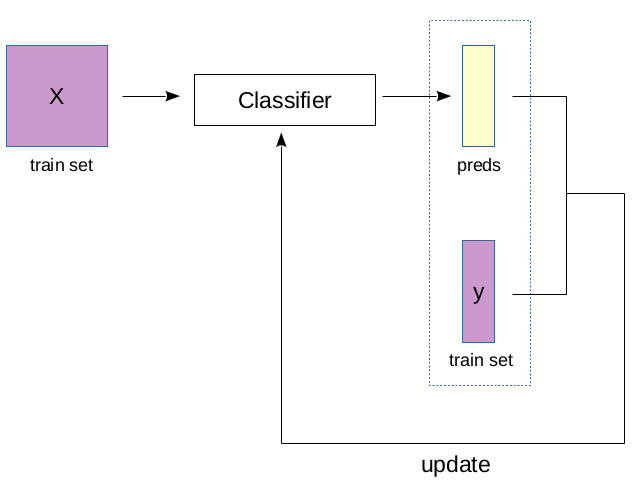

Finally, we evaluate the model's performance on the test set:

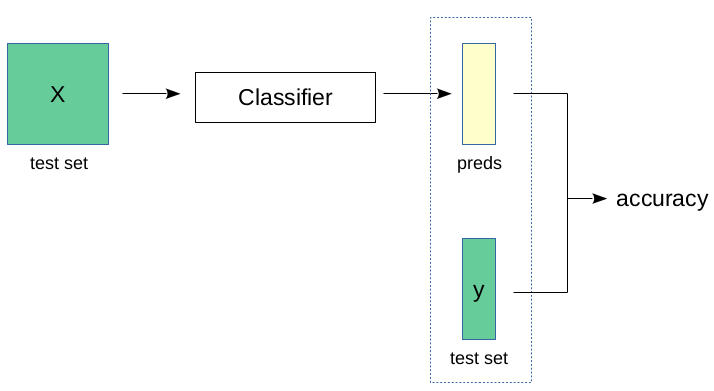

Scikit-learn has a function to help us with the splitting:

In [5]:
from sklearn.model_selection import train_test_split

# This function handles both shuffling and splitting
train, test, train_labels, test_labels = train_test_split(iris['data'], iris['target'], test_size=0.4)
print('Full data size:')
print(iris['data'].shape, iris['target'].shape)
print('\nTraining data size:')
print(train.shape, train_labels.shape)
print('\nTest data size:')
print(test.shape, test_labels.shape)

Full data size:
(150, 4) (150,)

Training data size:
(90, 4) (90,)

Test data size:
(60, 4) (60,)


## Training classifiers

It's time to create a classifier. The first one we will use is [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). In scikit-learn all models are instances of a class called an *estimator*. This helps us a lot because most estimators share the same methods.

The usual way of handling estimators in python is:
```python
from sklearn.models_family import model  # models_family is the family of classifiers that model belongs to

my_model = model(...)  # as arguments we pass the values of any hyperparameters we wish to comtrol

my_model.fit(X_train, y_train)  # X_train: training data, y_train: training labels
                                # this line handles the complete training phase

preds = my_model.predict(X_test)  #  to generate predictions on the test set
```

In [6]:
from sklearn.linear_model import LogisticRegression  # LogisticRegression belongs to the family of linear_models

clf = LogisticRegression()  # we will use the default hyperparameter settings

clf.fit(train, train_labels)  # train the model. this might take a minute...

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Model evaluation

OK, we've trained the model. Now we have to see how well it performs. In order to do this we must first define a **metric**, or a function that evaluates the performance of our model. The simplest metric we can use in classification is **accuracy** (i.e. the number of correct predictions, over the number of total predictions). A full guide on scikit-learn metrics can be found [here](http://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation).

The most metrics are scikit-learn functions that accept two arguments: `y_test` (the test set labels) and `y_pred` (the model's predictions on the test set).

```python
from sklearn.metrics import desired_metric  # import the desired metric

y_pred = my_model.predict(X_test)  # generate predictions

print(desired_metric(y_test, y_pred))  # print the model's score 
```

In [7]:
from sklearn.metrics import accuracy_score

preds = clf.predict(test)

print(accuracy_score(test_labels, preds))

0.9833333333333333


So we scored 95% on the test set. While that might appear a good enough result, let's see if we can do better with other ML algorithms.

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# We will use the default arguments for all classifiers
mlp = MLPClassifier()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()

# Train the four classifiers
mlp.fit(train, train_labels)
knn.fit(train, train_labels)
dtc.fit(train, train_labels)
svc.fit(train, train_labels)

# Evaluate the classifiers
preds = mlp.predict(test)
print('mlp:', accuracy_score(test_labels, preds))
preds = knn.predict(test)
print('knn:', accuracy_score(test_labels, preds))
preds = dtc.predict(test)
print('dtc:', accuracy_score(test_labels, preds))
preds = svc.predict(test)
print('svc:', accuracy_score(test_labels, preds))

mlp: 0.9833333333333333
knn: 0.9833333333333333
dtc: 0.9666666666666667
svc: 0.9666666666666667


c:\users\thano\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Hyperparameters

It makes sense more complex classifiers will perform better than a linear one such as Logistic Regression. However these classifiers are **unoptimized**. In order to achieve the best performance we can, we must select the appropriate **hyperparameters**.

We'll start by trying to optimize the kNN classifier by choosing the best value of $k$. The most intuitive way of doing so is through a for loop.

Best accuracy 98.33% for k=3


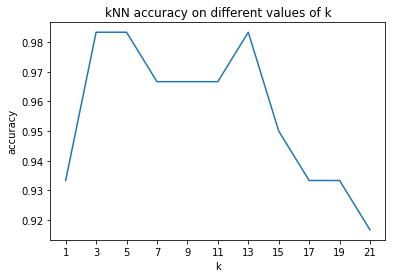

In [9]:
knn_accuracies = []
for k in range(1, 22, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train, train_labels)
    knn_accuracies.append(accuracy_score(test_labels, knn.predict(test)))

plt.plot(range(1, 22, 2), knn_accuracies)
plt.xticks(range(1, 22, 2))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('kNN accuracy on different values of k')

print('Best accuracy {:.2f}% for k={}'.format(max(knn_accuracies)*100, list(range(1, 22, 2))[np.argmax(knn_accuracies)]))

Turns out kNN was already at the optimum value of $k$, however that might not be the case for the rest of the classifiers. For example [Support Vector Machines](http://scikit-learn.org/stable/modules/svm.html) have many parameters we can optimize (for instance its *kernel*, *C* and *gamma*). 

In [10]:
lin_svm_accuracies = []

for C in [0.1, 1, 10, 100, 1000]:
    svc = SVC(C=C, kernel='linear')
    svc.fit(train, train_labels)
    lin_svm_accuracies.append(accuracy_score(test_labels, svc.predict(test)))

rbf_svm_accuracies = []

for C in [0.1, 1, 10, 100, 1000]:
    for gamma in [0.01, 0.001, 0.0001]:
        svc = SVC(C=C, gamma=gamma, kernel='rbf')
        svc.fit(train, train_labels)
        rbf_svm_accuracies.append(accuracy_score(test_labels, svc.predict(test)))

print('Best accuracy: {:.2f}%'.format(max(lin_svm_accuracies + rbf_svm_accuracies)*100))

Best accuracy: 98.33%


## Preprocessing

> Any modification performed on the data before feeding them to a ML algorithm.

In order to improve the performance of our model, in many occasions we must improve the quality of the data we train it on. The phrase [garbage in, garbage out](https://en.wikipedia.org/wiki/Garbage_in,_garbage_out) is especially applicable in ML and dictates that we must strive to improve the quality of the training data.

We have seen many possible pre-processing steps, such as [data cleaning](https://en.wikipedia.org/wiki/Data_cleansing) and handling [missing data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4), [encoding](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) the data, most of the time they are not enough.

Other steps we could perform are [scaling](https://en.wikipedia.org/wiki/Feature_scaling), dimensionality reduction, decomposition and balancing. The latter will be examined in the next tutorial.

### Feature scaling

Feature scaling is important for ensuring that ML algorithms pay the same attention to all features. Imagine a kNN classifier that uses the euclidean distance. When attempting to train this model in a dataset whose features differ in range, the distance will be governed by the features that have the broadest range. Another reason is that Gradient Descent converges faster on scaled features.

There are two main ways we can scale our features:

- **normalization**:
$$X_{normalized} = {X - X_{min} \over X_{max} - X_{min}}$$


- **standardization**:
$$X_{standardized} = {X- \mu \over \sigma}$$  
where $μ$ is the mean and $σ$ is the standard deviation of $X$.

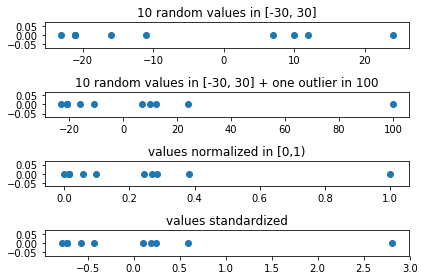

In [11]:
from scipy import stats

f1 = plt.subplot(411)
f2 = plt.subplot(412)
f3 = plt.subplot(413)
f4 = plt.subplot(414)

# randomly place 10 values in [-30, 30]
x= np.random.randint(-30, 30, size=10)
y = [0] * len(x)
f1.scatter(x,y)
f1.set_title('10 random values in [-30, 30]')

# add an outlier
x = np.append(x, 100)
y = [0]*len(x)
f2.scatter(x, y)
f2.set_title('10 random values in [-30, 30] + one outlier in 100')

# normalization
min_max_x = (x - np.min(x) )/ (np.max(x) - np.min(x))
f3.scatter(min_max_x,y)
f3.set_title("values normalized in [0,1)")

# standardization
std_x = stats.zscore(x)
f4.scatter(std_x, y)
f4.set_title("values standardized")

plt.tight_layout()

Let's see how we add a scaler in scikit-learn. Note that we should fit the scaler **only** on the training set (in order to calculate the mean and standard deviation of this set) and then transform **both** sets with this scaler.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # define scaler
scaler.fit(train)  # fit scaler ONLY on the training data

print('mean: {}\nstd:  {}'.format(scaler.mean_ , scaler.scale_))

# transform on both sets:
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

mean: [5.89444444 3.04444444 3.88222222 1.22222222]
std:  [0.85314596 0.43795259 1.77185263 0.75832825]


Preprocessing functions also have a `.fit_transform()` methods which we could have used like this:

```python
train_scaled = scaler.fit_transform(train)  # we should still fit the scaler ONLY on the training data
test_scaled = scaler.transform(test)
```

## Pipelines

scikit-learn [pipelines](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) provide a convenient way for incorporating multiple steps in a ML workflow.

All intermediate steps in a pipeline must implement both a `.fit()` and a `.transform()` argument (like the scaler we saw before). The last step should be an estimator. We need to pass these steps, sequentially, as a *list* of *tuples*, each containing the name and object of the transform/estimator.

```python
from sklearn.pipeline import Pipeline

pipe = Pipeline([('transform1', transform1), ('transform2', transform2), ..., ('estimator', estimator)])
```

Let's try to implement a pipeline containing the scaler and knn models. 

In [13]:
from sklearn.pipeline import Pipeline

scaler = StandardScaler() 
knn = KNeighborsClassifier(n_neighbors=11)

pipe = Pipeline([('standardizer', scaler), ('classifier', knn)])
pipe.fit(train, train_labels)
preds = pipe.predict(test)
print(accuracy_score(test_labels, preds))

0.9333333333333333


An easier way to create Pipelines is through scikit-learn `make_pipeline` function. This is a shorthand for the Pipeline constructor, that does not require naming the estimators. Instead, their names will be set to the lowercase of their types automatically.

```python
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(scaler, knn) 
```

## Grid search

Before we attempted to optimize an SVM by selecting its hyperparameters through a for loop. There is a much easier way provided through scikit-learn [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). This function takes two main arguments: an estimator (or pipeline) and a *grid* of parameters we want the grid search to consider. The grid could be one of two things:

- A dictionary with the hyperparameter names as its keys and a list of values as the corresponding dictionary value:
```python
grid = {'name1': [val1, val2, val3], 'name2': [val4, val5], ...}
```
This will force the grid search to search for **all** possible combinations of parameter values:  
(val1, val4, ...), (val1, val5, ...), (val2, val4, ...), (val2, val5, ...), ... etc.


- A list of such dictionaries:
```python
grid = [{'name1': [val1, val2, val3], 'name2': [val4, val5], ...},
        {'name1': [val1, val2, val3], 'name3': [val6, val7], ...}]
```
This will create a grid that contains combinations from both dictionaries.

After creating such a grid:

```python
from sklearn.model_selection import GridSearchCV

grid = {...}
clf = GridSearchCV(estimator, grid)
clf.fit(X_train, y_train)  # will search all possible combinations defined by the grid
preds = clf.predict(X_test)  # will generate predictions based on the best configuration

# In order to access the best model:
clf.best_estimator_
```

We will reproduce the previous hyperparameter tuning we performed, through a grid search.

In [14]:
from sklearn.model_selection import GridSearchCV

# configurations we searched previously
grid = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
        {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}]

clf = GridSearchCV(svc, grid, cv=2)
clf.fit(train, train_labels)
print('Best accuracy: {:.2f}%'.format(accuracy_score(test_labels, clf.predict(test))*100))
print(clf.best_estimator_)  # print the best configuration

Best accuracy: 98.33%
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


If we use a pipeline instead of an estimator, we need to specify which step each parameter belongs to. This is done by adding both the name of the step and the name of the parameter separated by two underscores. 

```python
pipe = Pipeline([('step1', ...), ...])
grid = {'step1__param1`': [val1, ...], ...}  # this dictates param1 from step1 to take the values [val1, ...]
clf = GridSearchCV(pipe, grid)
clf.fit(X_train, y_train)  # will search all possible combinations defined by the grid
preds = clf.predict(X_test)  # will generate predictions based on the best configuration
```

In [15]:
pipe = Pipeline([('standardizer', scaler), ('classifier', svc)])

grid = [{'classifier__C': [0.1, 1, 10, 100, 1000], 'classifier__kernel': ['linear']},
        {'classifier__C': [0.1, 1, 10, 100, 1000], 'classifier__gamma': [0.01, 0.001, 0.0001], 'classifier__kernel': ['rbf']}]

clf = GridSearchCV(pipe, grid, cv=2)
clf.fit(train, train_labels)
print('Best accuracy: {:.2f}%'.format(accuracy_score(test_labels, clf.predict(test))*100))
print(clf.best_estimator_)  # print the best configuration

Best accuracy: 96.67%
Pipeline(memory=None,
     steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
